In [1]:
!pip install pandas
!pip install ggplot
!pip install matplotlib
!pip install seaborn
!pip install adjustText
!pip install numpy
!pip install tkinter
!pip install scipy

ERROR: Could not find a version that satisfies the requirement tkinter (from versions: none)
ERROR: No matching distribution found for tkinter


In [4]:
import pandas as pd
from plotnine import *
from matplotlib.axis import Axis
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from adjustText import adjust_text
from tkinter import * 
from tkinter import font
from scipy import interpolate

q1 = pd.read_csv("/Users/minhtran/Desktop/GSB544/Lab 1/Data/q1data.csv")

q1

,income,life_exp,population,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,1910.0,61.0,29200000.0,2010,Afghanistan,asia,south_asia,asia_west,South Asia
1,11100.0,78.1,2950000.0,2010,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,11100.0,74.7,36000000.0,2010,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,46900.0,81.9,84500.0,2010,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
4,7680.0,60.8,23400000.0,2010,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...
192,20400.0,75.4,28400000.0,2010,Venezuela,americas,america,america_south,Latin America & Caribbean
193,5350.0,73.3,88000000.0,2010,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
194,4700.0,67.8,23200000.0,2010,Yemen,asia,middle_east_north_africa,asia_west,Middle East & North Africa
195,3200.0,57.5,13600000.0,2010,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


The aesthetics being used are:

Bubble Plot

- X-axis: Income
- Y-axis: Life Expectancy
- Size: population
- Color: continents (four_regions)
- There are also the labels of Income on the x-axis and Life Expectancy on the y-axis
- There are also annotations inside the graph: "at birth" on the y-axis and "GDP per capita" on the x-axis.
- There is also a watermark of 2010 behind the graph
- The scale of the x-axis is done logarithmically

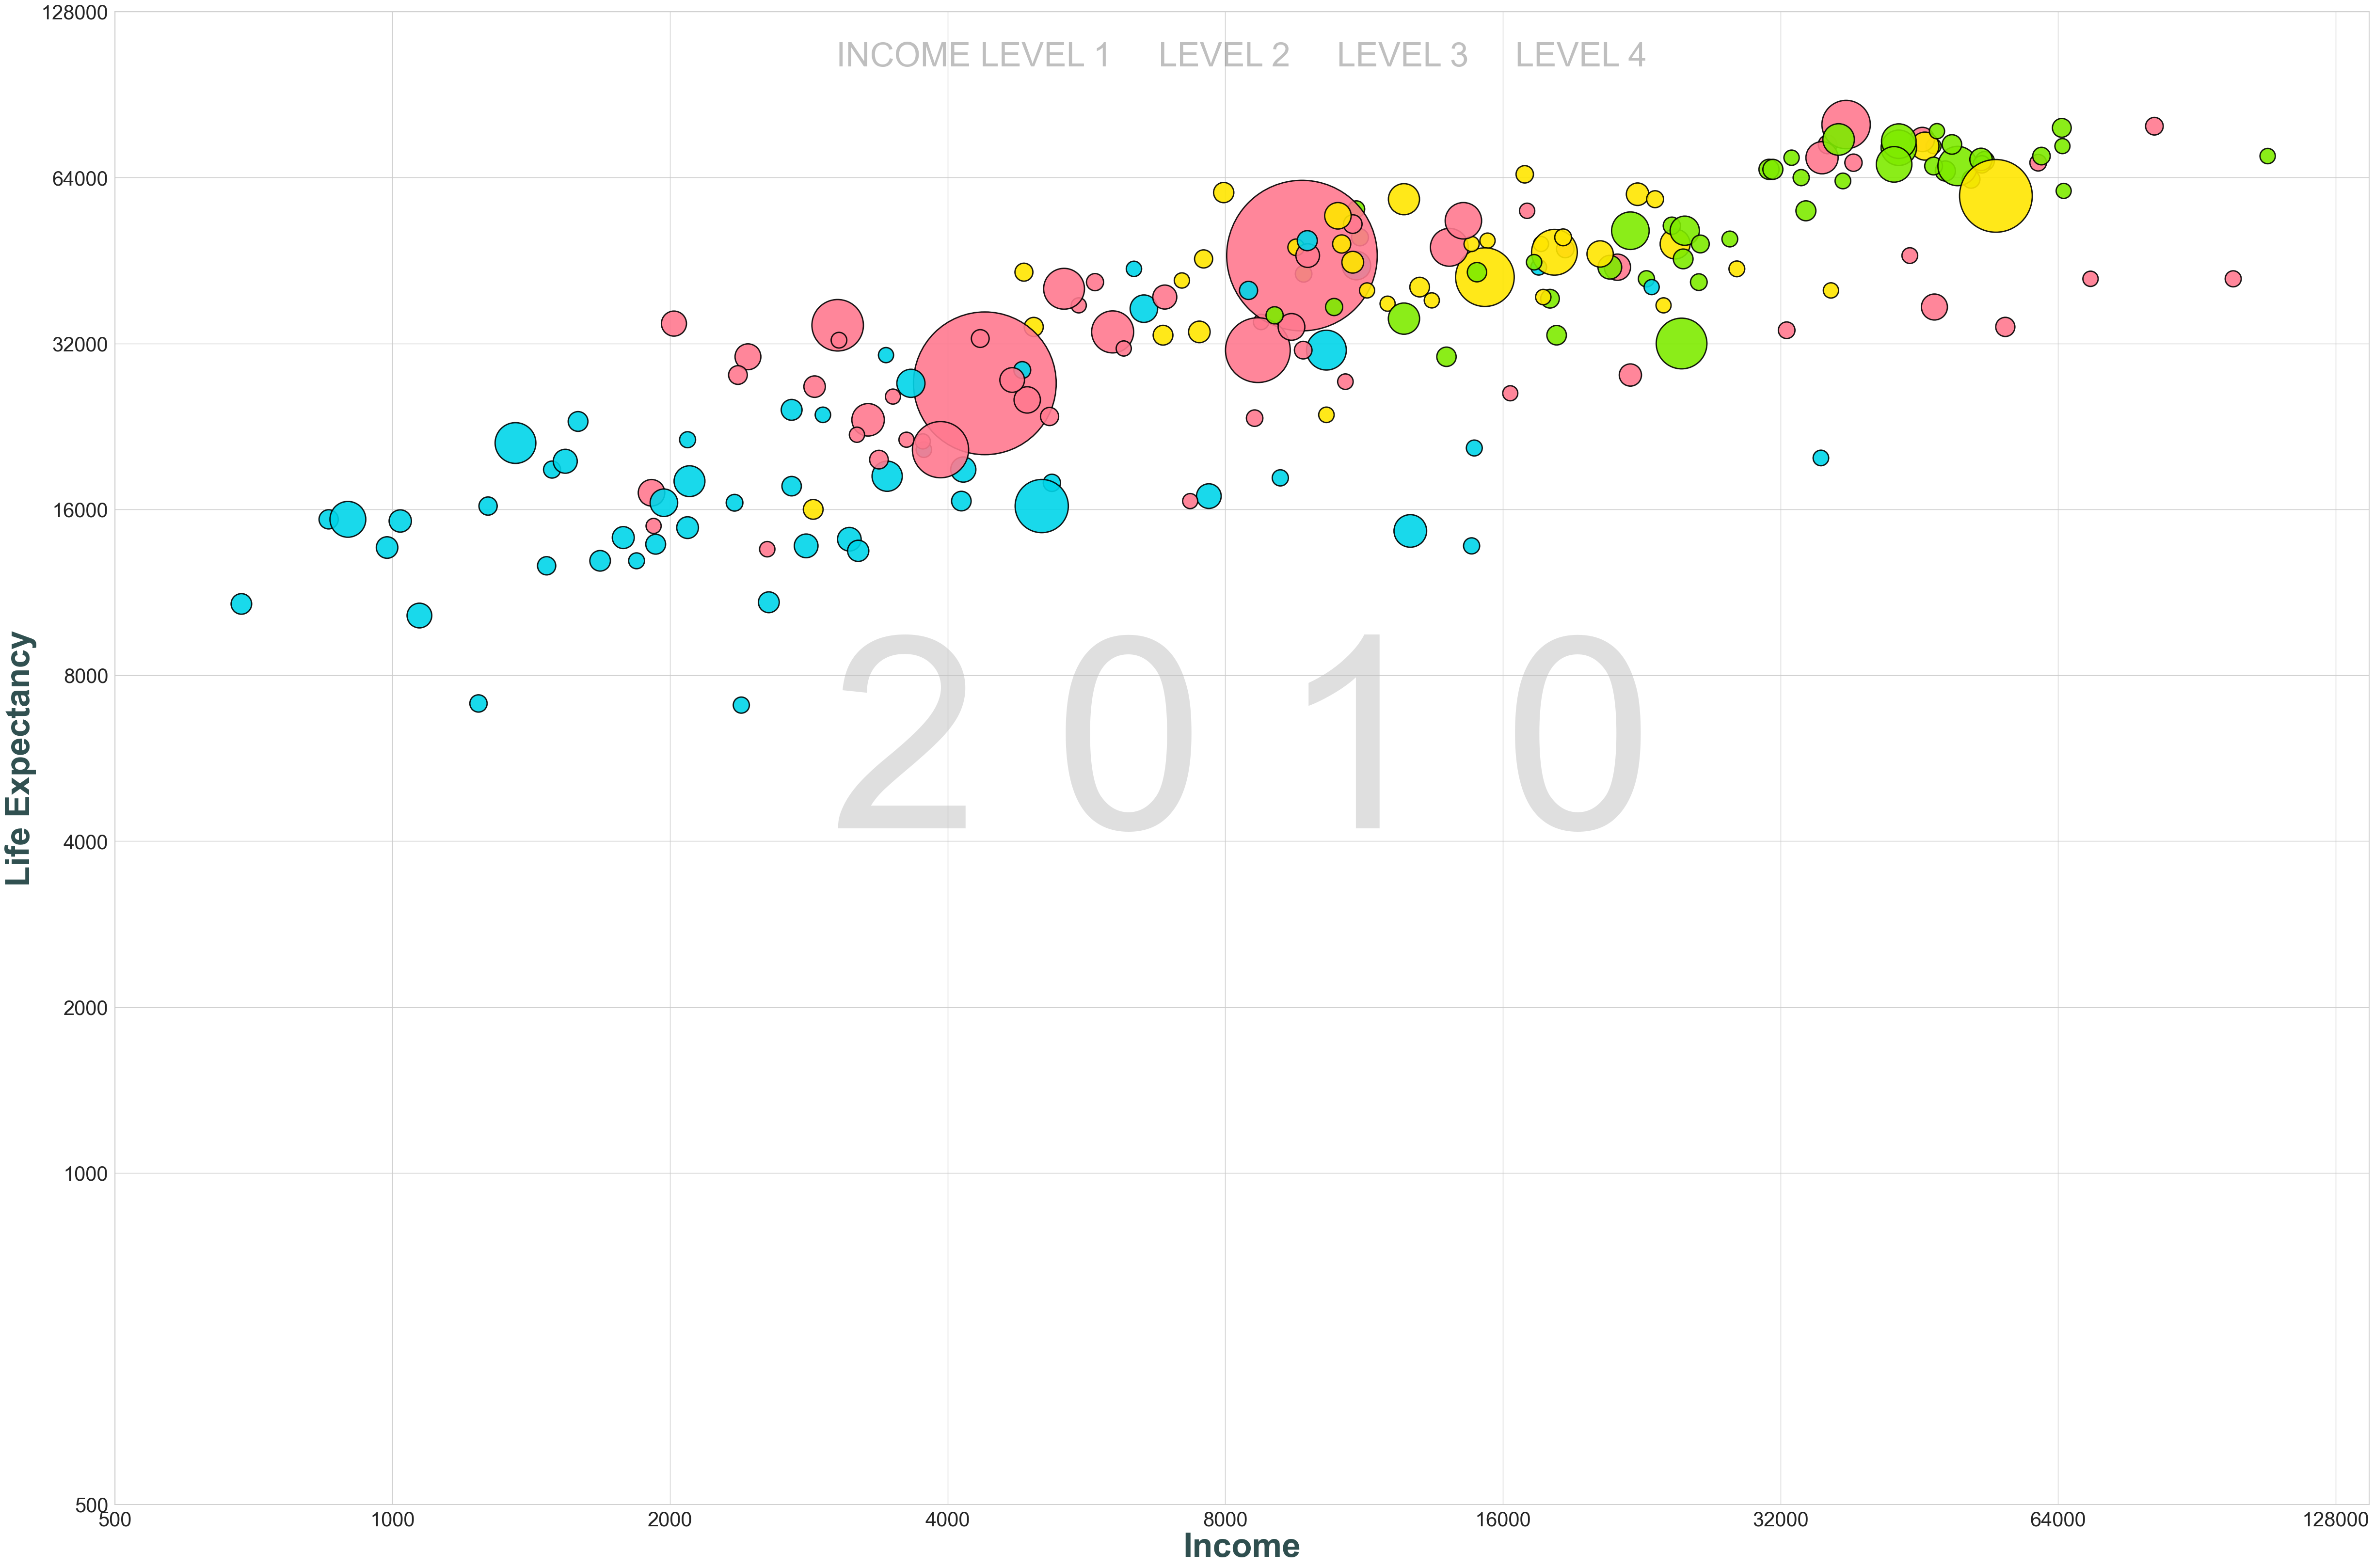

In [11]:
#Style the seaborn theme
sb.set_theme()
sb.set_style('whitegrid')
colors = ["#FF798F", "#7FEB00", "#00D5E9", "#FFE600"]
sb.set_palette(sb.color_palette(colors))

#Set notebook's figure size
plt.rcParams['figure.figsize'] = [60, 40]


#Set up bubble plot
q1_graph = sb.scatterplot(data = q1,
               x = "income",
               y = "life_exp",
               size = "population",
               legend = False,
               alpha = 0.9,
               hue = "four_regions",
               edgecolor = 'black',
               linewidth = 2,
               sizes = (500, 50000),
               zorder = 3)


#Scale x-axis & y-axis

x_ticks = [500, 1000, 2000, 4000, 8000, 16000, 32000, 64000, 128000]
x_labels = [str(x) for x in x_ticks]
q1_graph.set_xscale('log')
q1_graph.set_xticks(x_ticks)
q1_graph.set_xticklabels(x_labels, size = 30)


y_ticks = [0, 20, 30, 40, 50, 60, 70, 80, 90]
y_labels = [str(x) for x in x_ticks]


q1_graph.set_yticks(y_ticks)
q1_graph.set_yticklabels(y_labels, size = 30)






#Add 2022 Watermark & Income Level

q1_graph.text(0.5, 0.5, '2 0 1 0',
              transform = q1_graph.transAxes,
              fontsize = 400, 
              color='silver', 
              alpha=0.5,
              ha='center', 
              va='center',
              zorder = 1)

q1_graph.text(0.5, 0.98, "INCOME LEVEL 1     LEVEL 2     LEVEL 3     LEVEL 4",
              transform = q1_graph.transAxes,
              fontsize = 50, 
              color='gray', 
              alpha=0.5,
              ha='center', 
              va='top')


#Add annotations



#Add labels

plt.xlabel("Income",
           fontweight = "bold",
           font = "Sans Serif",
           color = "darkslategray", 
           fontsize = '50', 
           horizontalalignment='center')

plt.ylabel("Life Expectancy", 
           fontweight = "bold",
           font = "Sans Serif",
           color = "darkslategray", 
           fontsize = '50', 
           verticalalignment='center',
           labelpad = 30)
    
#Show the graph
plt.show()

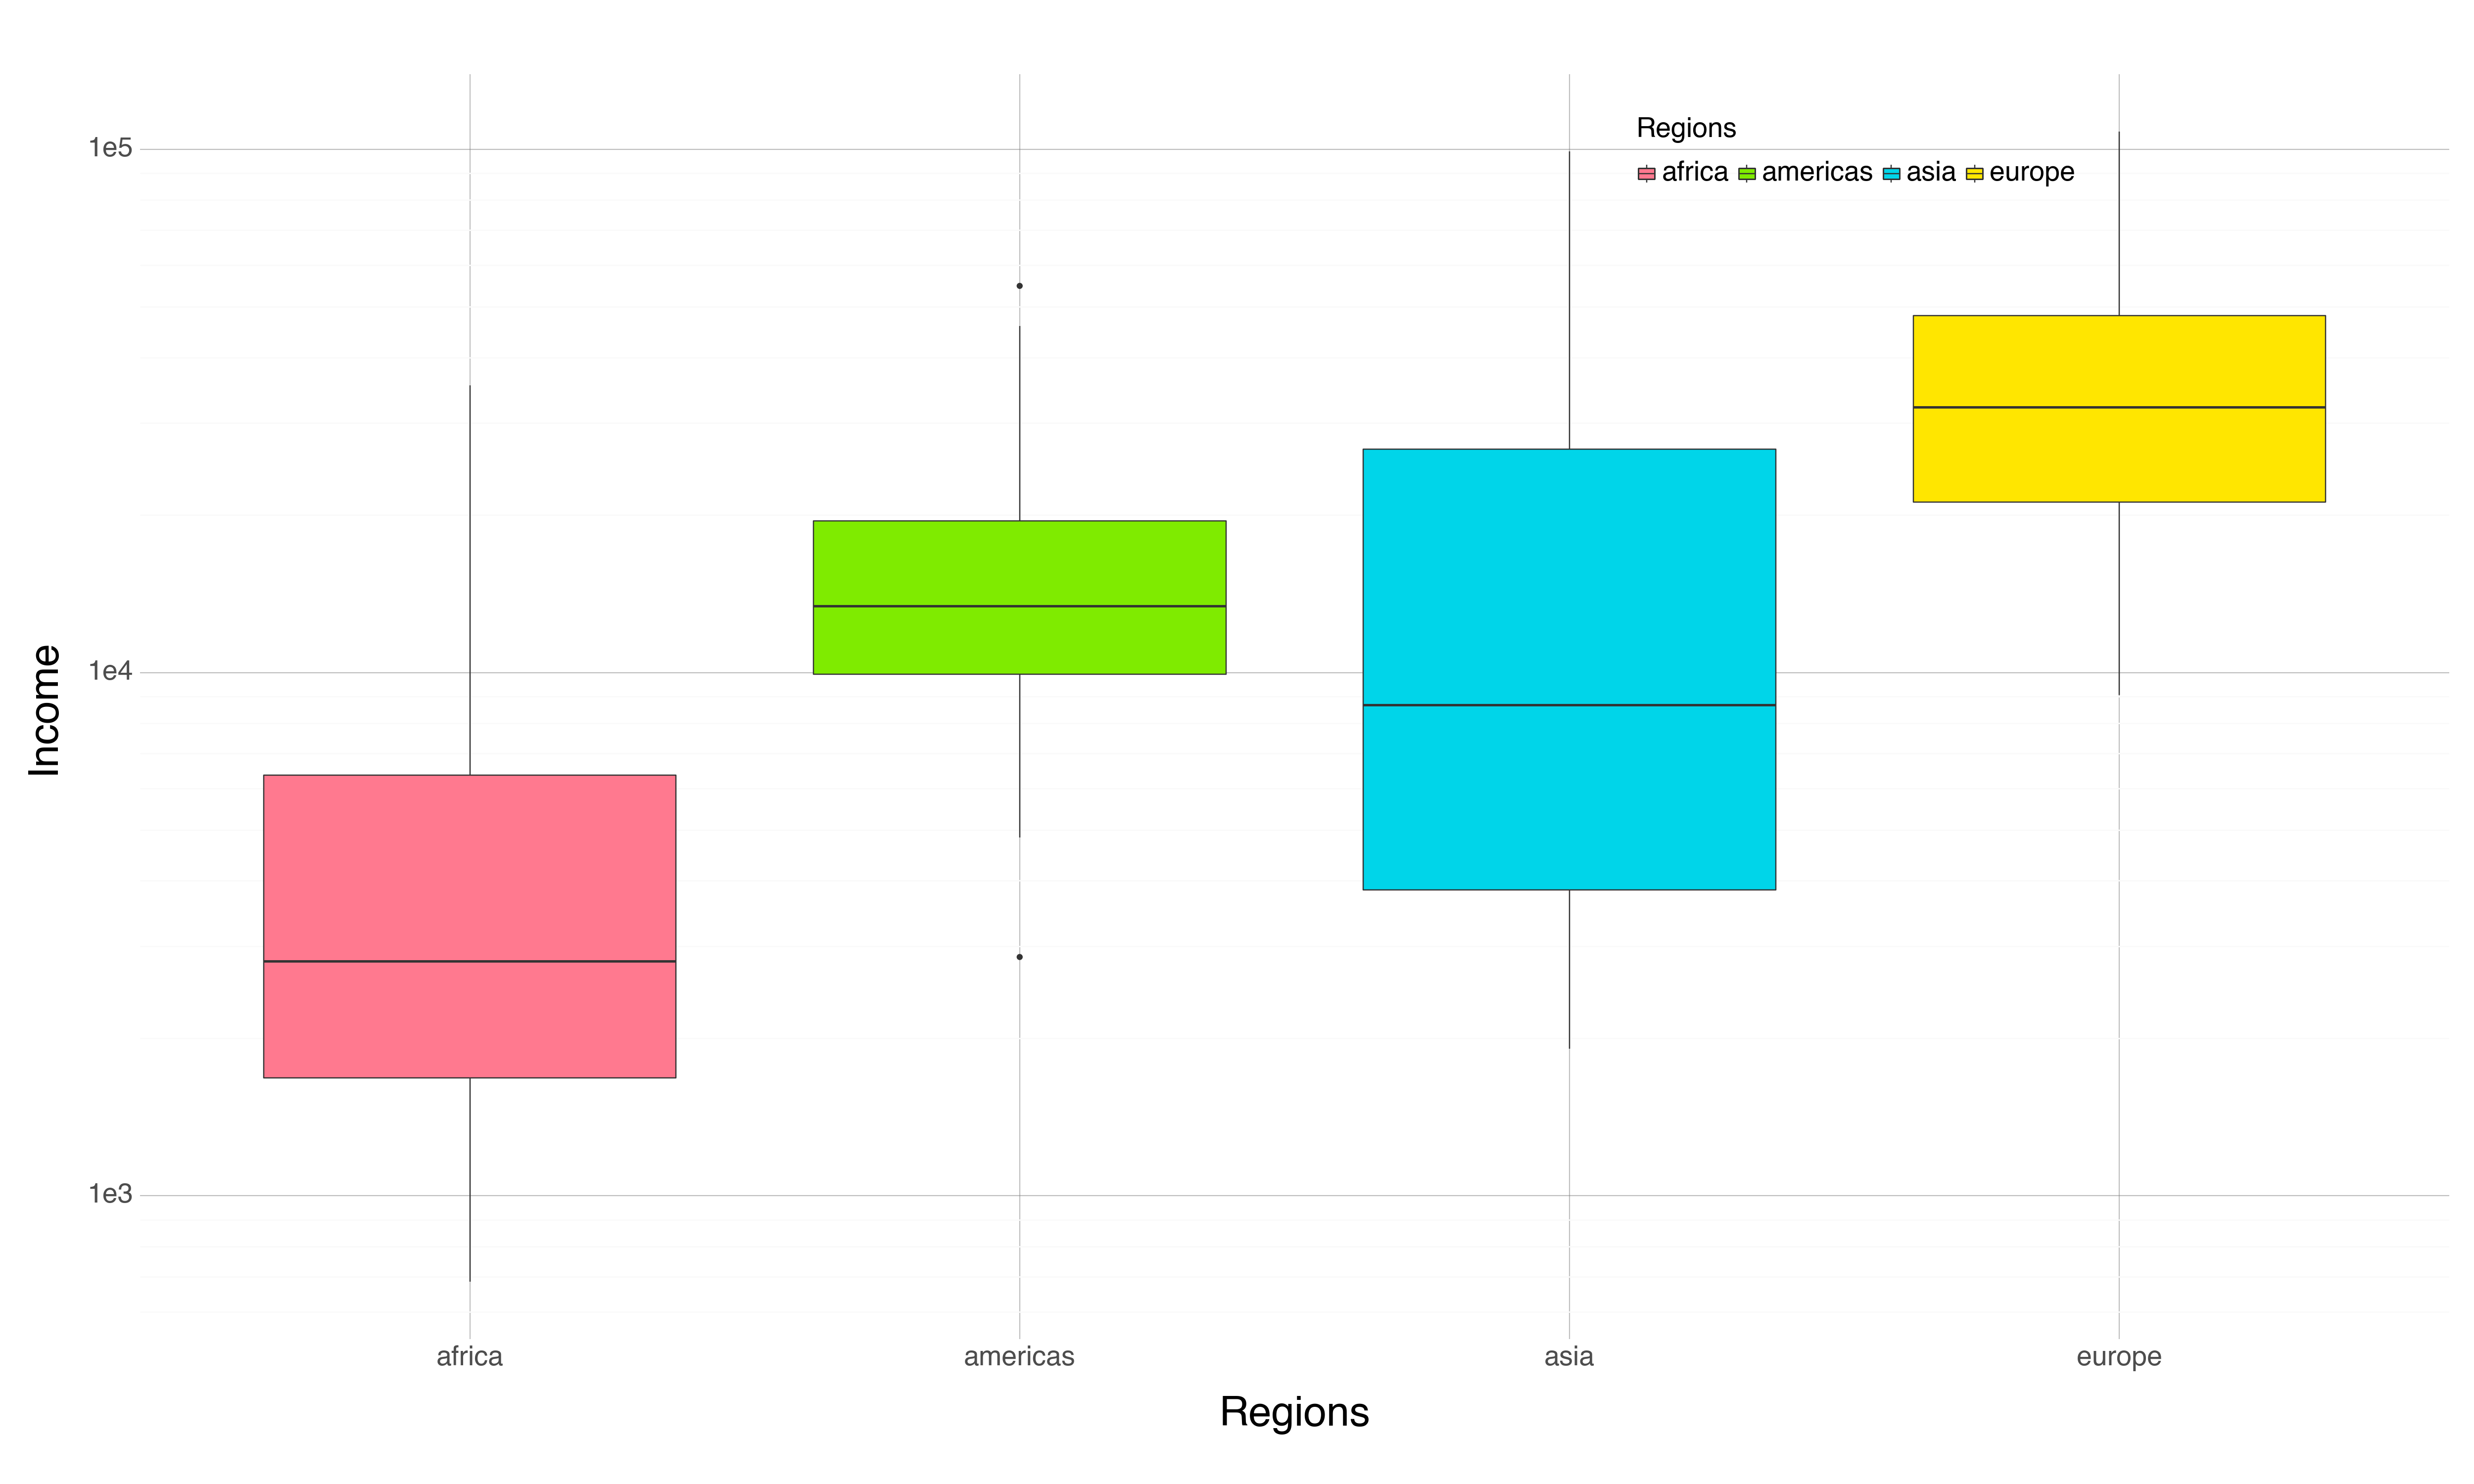

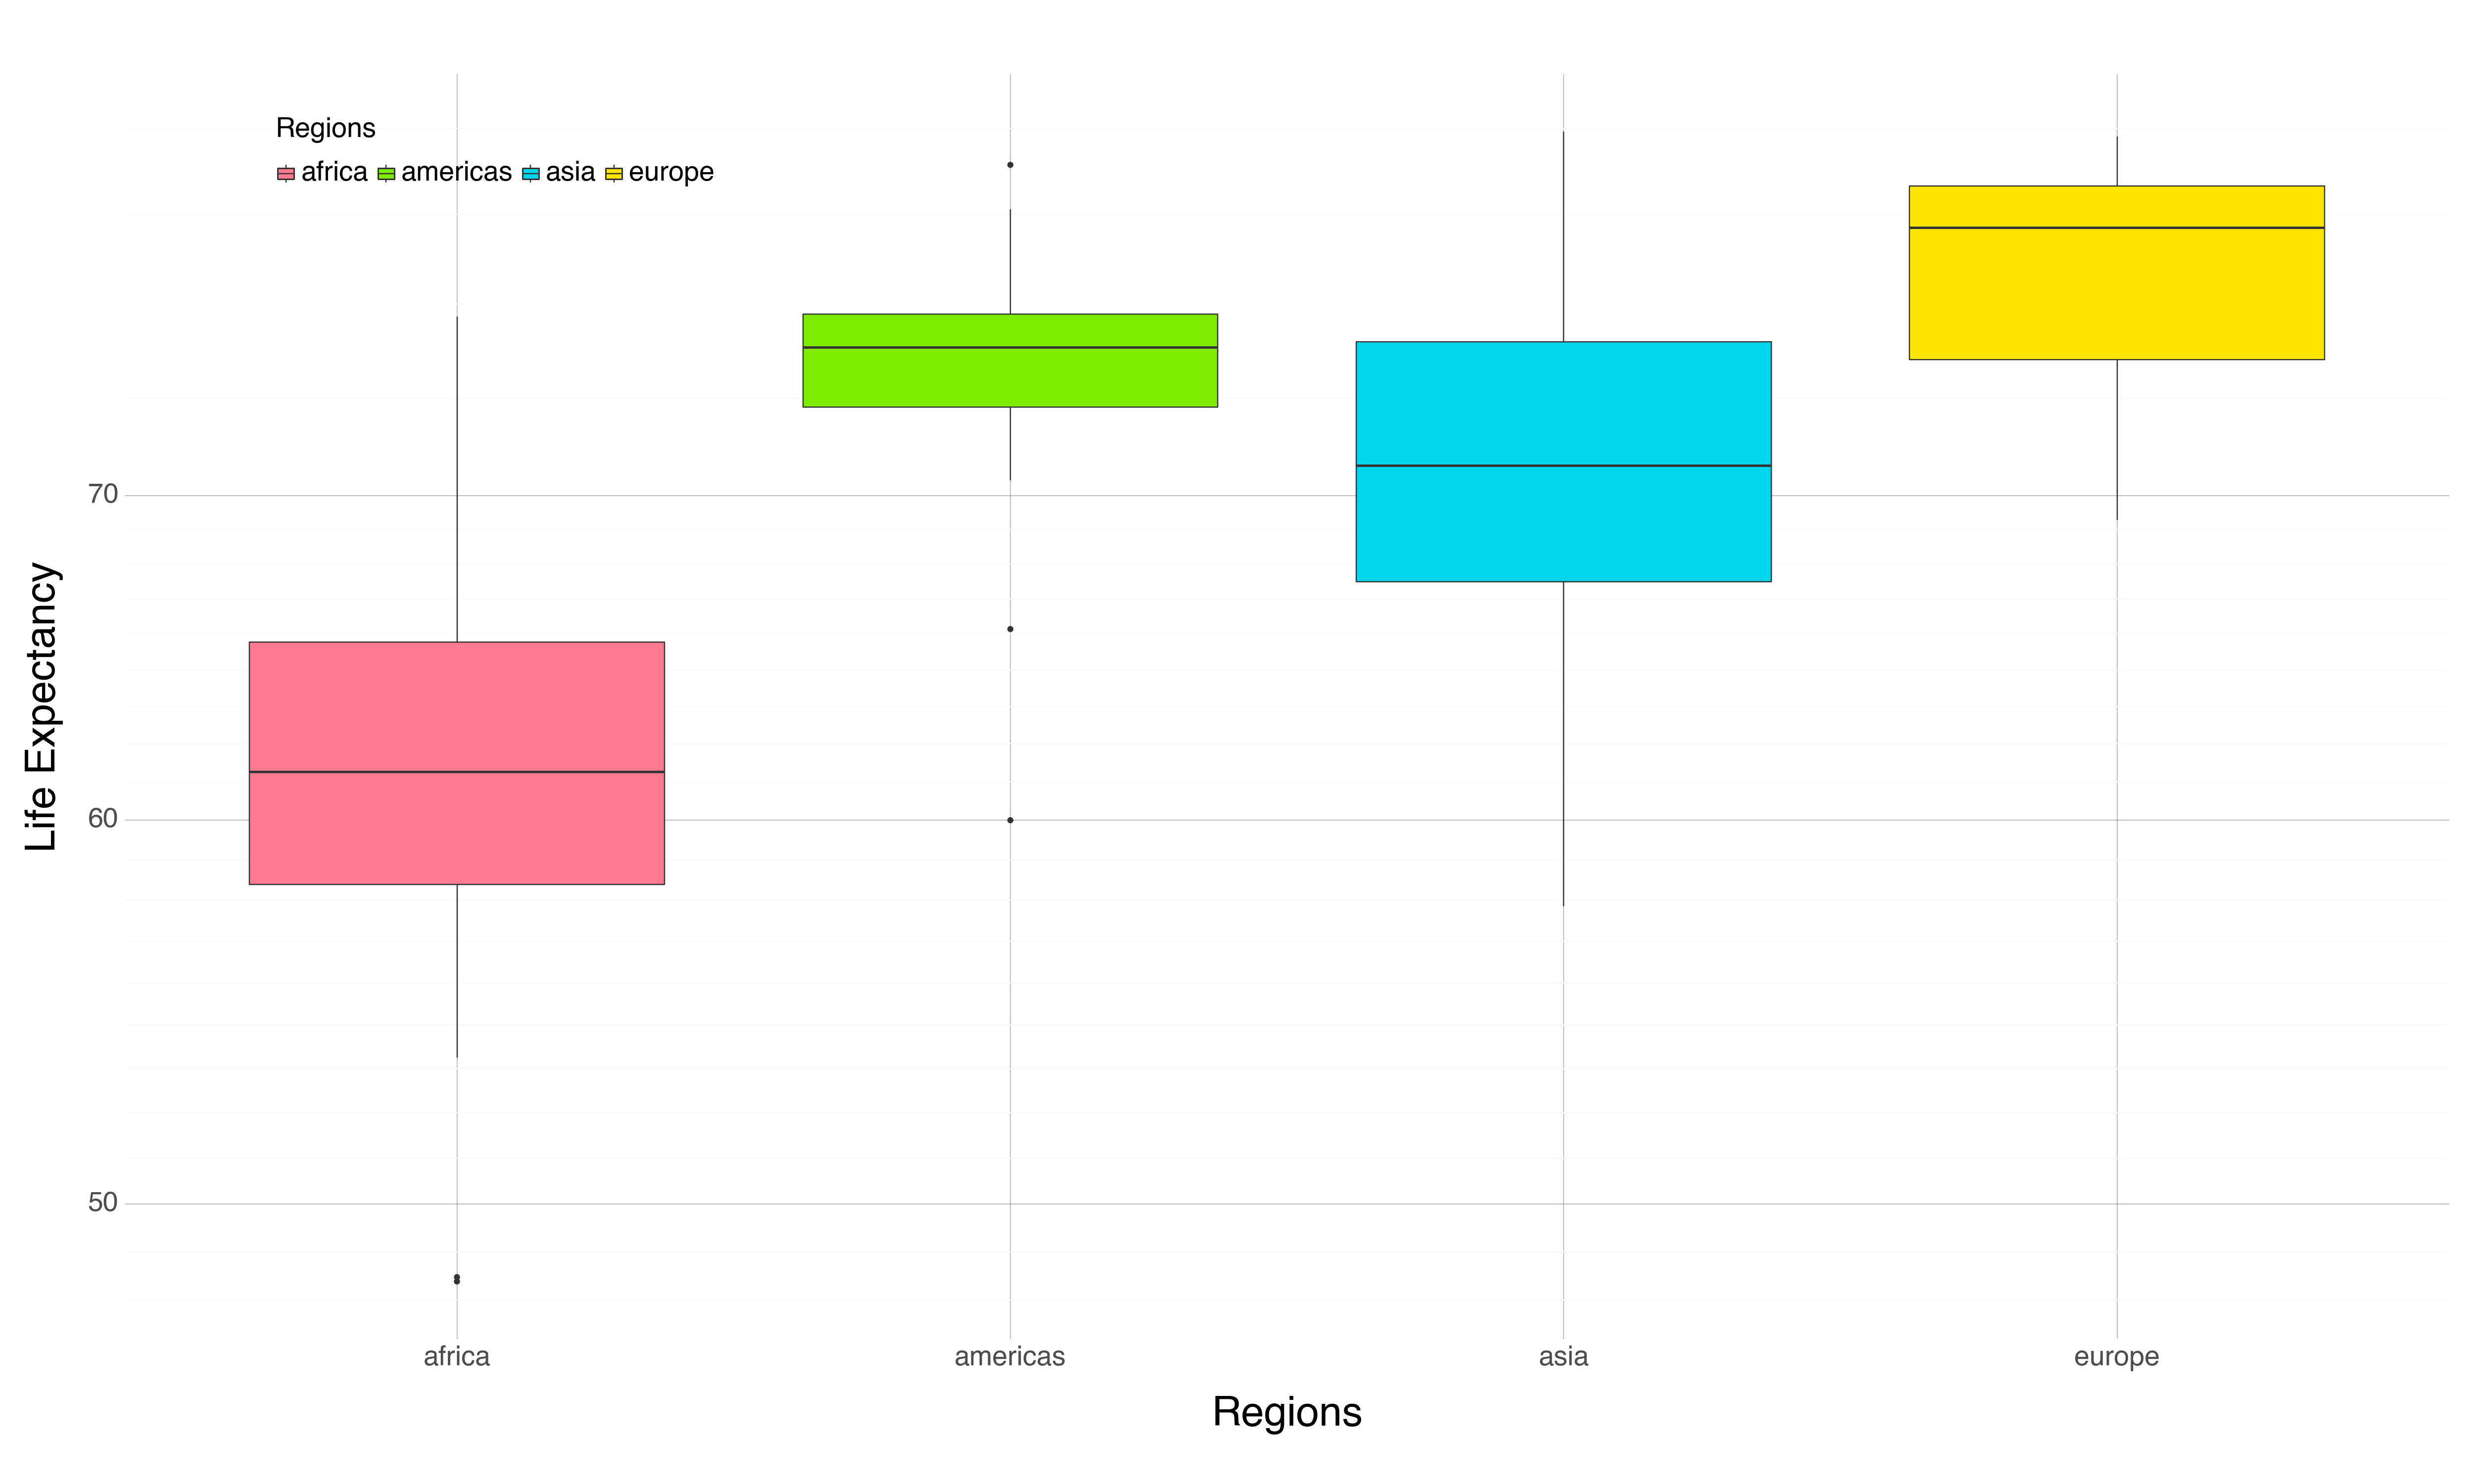

/Users/minhtran/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 2 rows containing non-finite values.


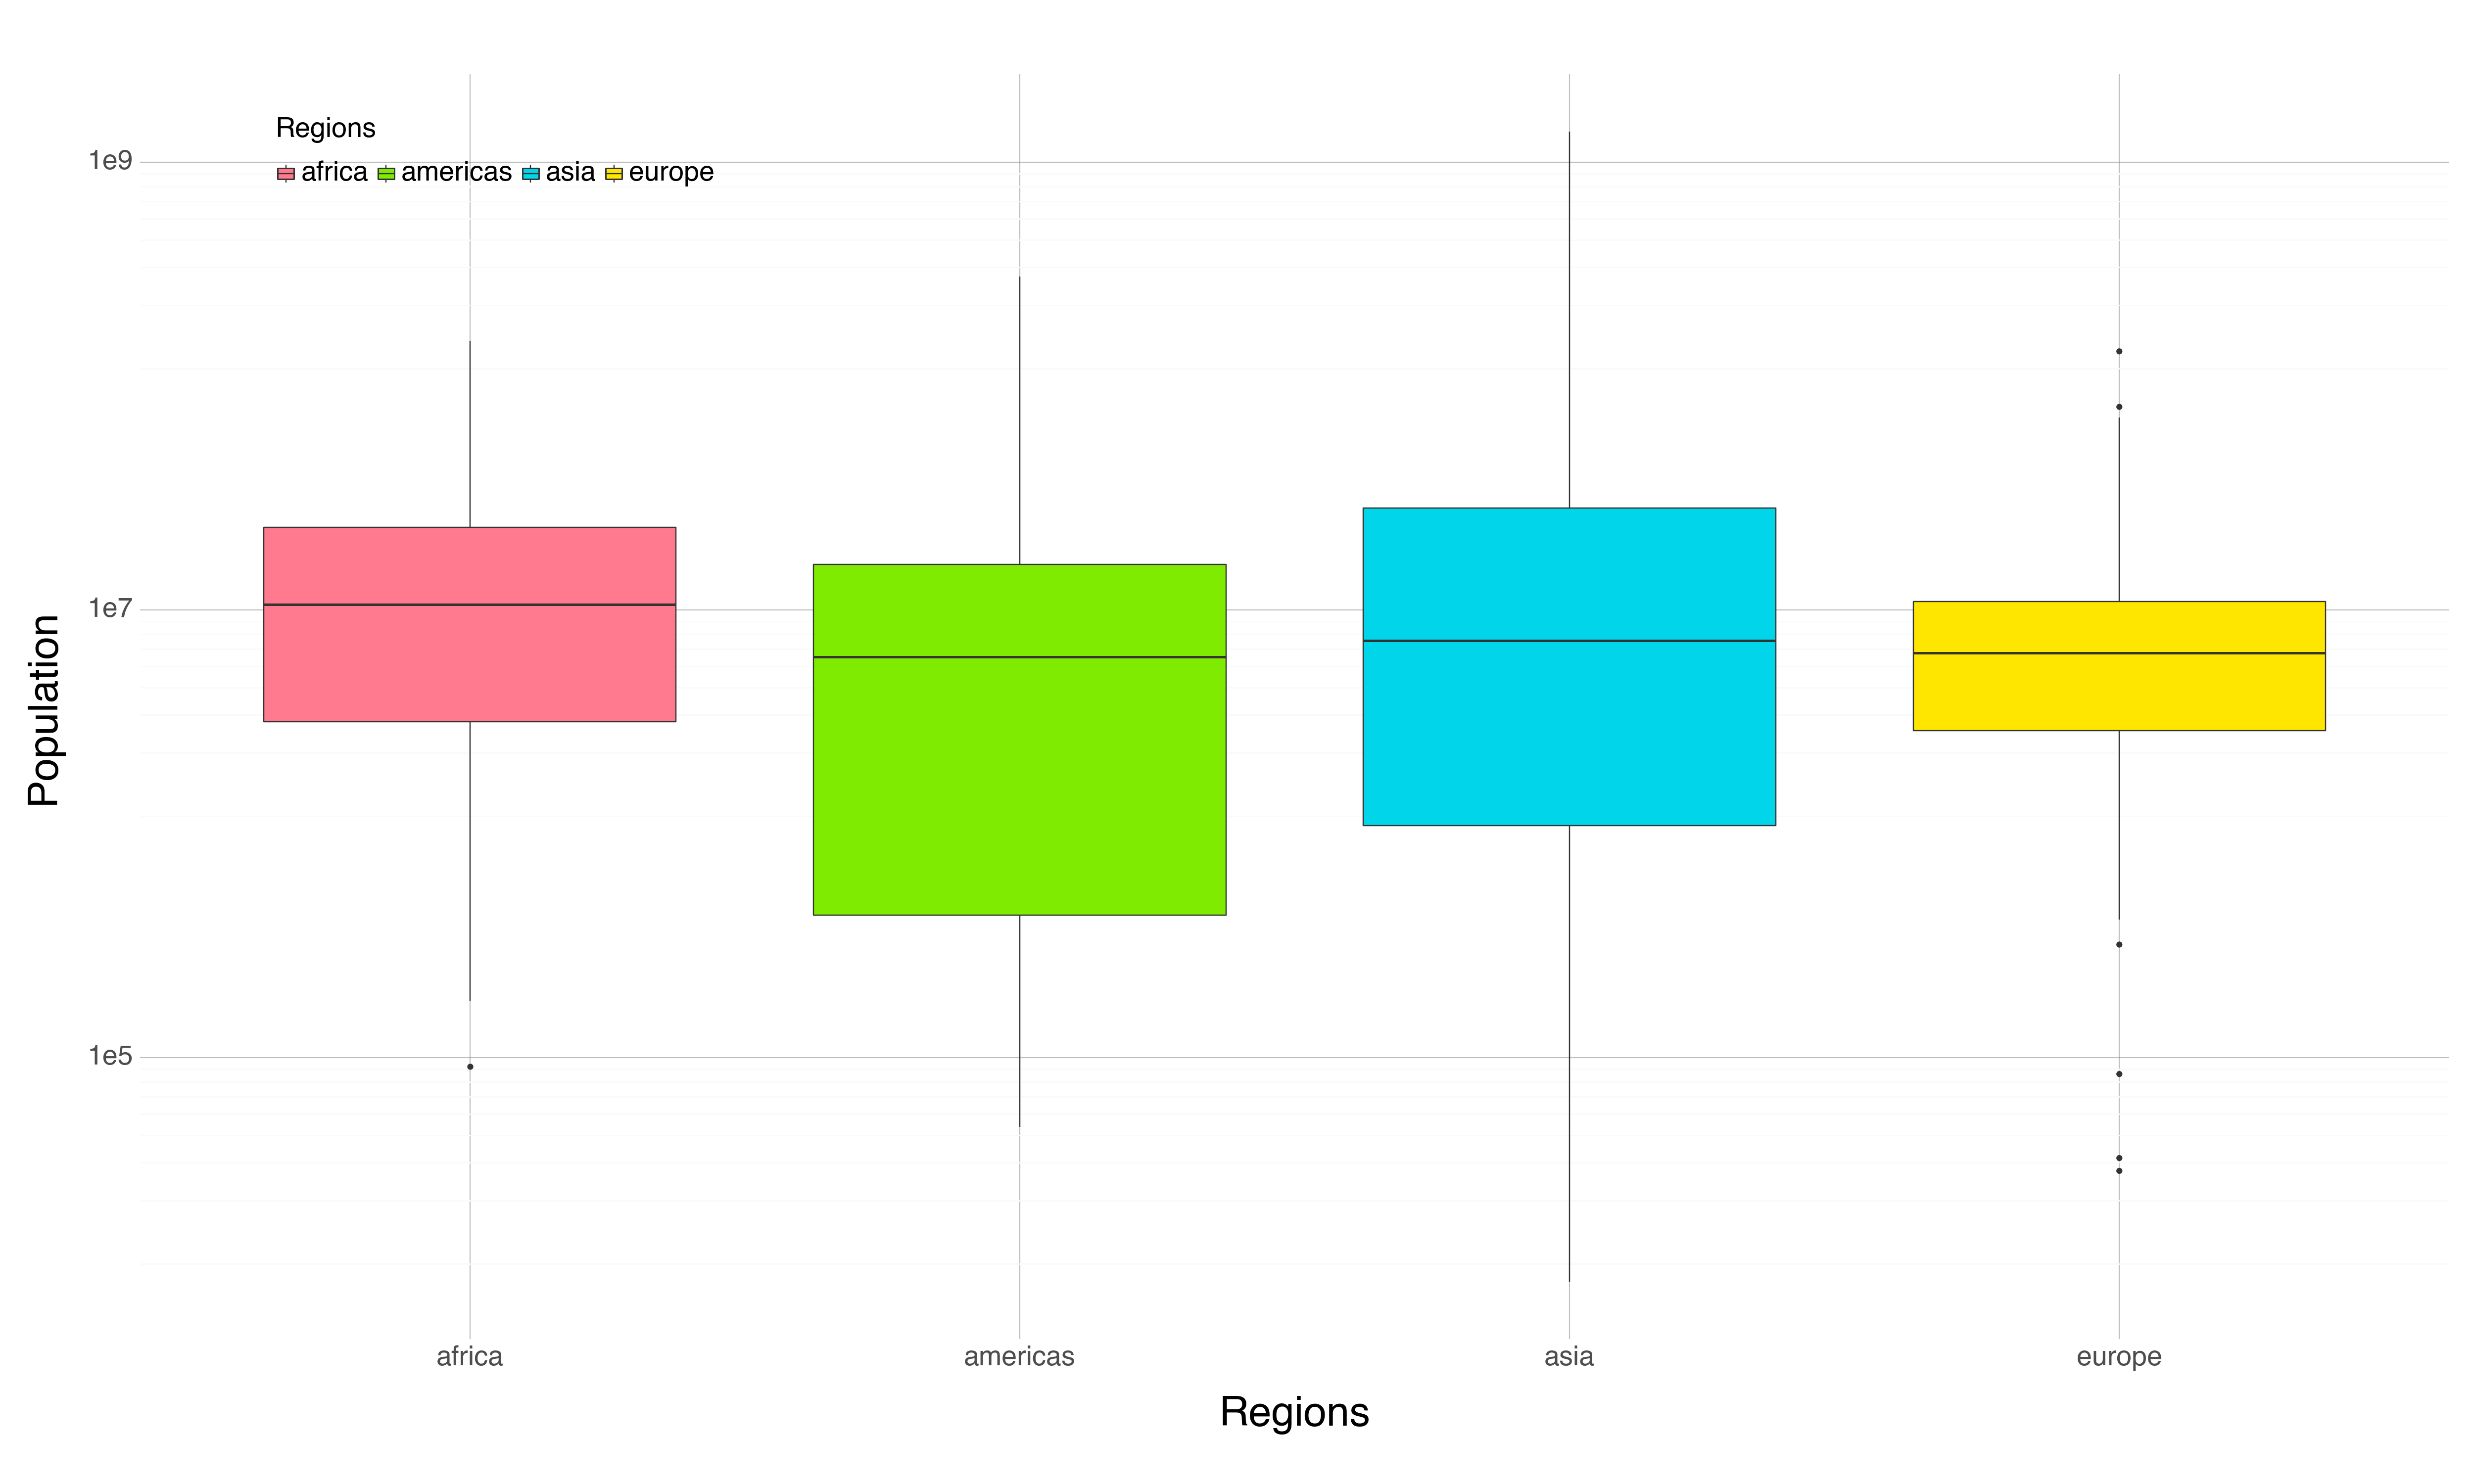

In [26]:
# Define color palette
colors = ["#FF798F", "#7FEB00", "#00D5E9", "#FFE600"]

# Filter the data to exclude "nan" values in the "four_regions" variable
q1_filtered = q1.dropna(subset=['four_regions'])

# Create the Plotnine plot
plot1a = (ggplot(q1_filtered, aes(x="four_regions", y="income", fill="four_regions"))
        + geom_boxplot()
        + scale_fill_manual(values=colors)  # Set color palette
        + labs(x="Regions", y="Income")
        + scale_y_log10()  # Set y-axis scale to logarithmic
        + theme_minimal()  # Set theme to minimal
        + theme(figure_size=(25, 15))  # Adjust figure size
        + theme(text=element_text(size=20), axis_title=element_text(size=30, face="bold"), legend_title=element_text(size=20))  # Adjust text and axis label sizes
        + theme(panel_grid_major=element_text(color="gray", alpha=0.5))  # Add gridlines
        + labs(fill="Regions")
        + theme(legend_position=(0.75, 0.9))  # Move legend to the right
        )


plot1b = (ggplot(q1_filtered, aes(x="four_regions", y="life_exp", fill="four_regions"))
        + geom_boxplot()
        + scale_fill_manual(values=colors)  # Set color palette
        + labs(x="Regions", y="Life Expectancy")
        + scale_y_log10()  # Set y-axis scale to logarithmic
        + theme_minimal()  # Set theme to minimal
        + theme(figure_size=(25, 15))  # Adjust figure size
        + theme(text=element_text(size=20), axis_title=element_text(size=30, face="bold"), legend_title=element_text(size=20))  # Adjust text and axis label sizes
        + theme(panel_grid_major=element_text(color="gray", alpha=0.5))  # Add gridlines
        + labs(fill="Regions")
        + theme(legend_position=(0.2, 0.9))  # Move legend to the left
        )

plot1c  = (ggplot(q1_filtered, aes(x="four_regions", y="population", fill="four_regions"))
        + geom_boxplot()
        + scale_fill_manual(values=colors)  # Set color palette
        + labs(x="Regions", y="Population")
        + scale_y_log10()  # Set y-axis scale to logarithmic
        + theme_minimal()  # Set theme to minimal
        + theme(figure_size=(25, 15))  # Adjust figure size
        + theme(text=element_text(size=20), axis_title=element_text(size=30, face="bold"), legend_title=element_text(size=20))  # Adjust text and axis label sizes
        + theme(panel_grid_major=element_text(color="gray", alpha=0.5))  # Add gridlines
        + labs(fill="Regions")
        + theme(legend_position=(0.2, 0.9))  # Move legend to the left
        )

# Show the plot
print(plot1a)
print(plot1b)
print(plot1c)

This is a spectacular graph that is clearly superior to the other for the following reasons:
Pros:
-Each region is organized into neat and beautiful different bars, because of that, you don't have to count the individual bubbles so that allows for ease of interpretation.
-Outliers are organized in a cleaner manner so you don't have to stretch your plot out to include them like how we did in the other graph.
-We can see the relationship between income, population, and life expectancy for each region.

Cons:
-The relationships are not reprensented in one graph like the bubble plot.

In [4]:
q2 = pd.read_csv("/Users/minhtran/Desktop/GSB544/Lab 1/Data/q2data.csv")
q2

,imports,exports,energy,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,NaN,NaN,NaN,1997,Afghanistan,asia,south_asia,asia_west,South Asia
1,36.7,11.5,427,1997,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,22.5,22.6,825,1997,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,NaN,NaN,1997,American Samoa,NaN,NaN,NaN,NaN
4,NaN,NaN,434,1997,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...
201,52.2,44.8,340,1997,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
202,NaN,NaN,NaN,1997,Virgin Islands (U.S.),NaN,NaN,NaN,NaN
203,NaN,NaN,241,1997,Yemen,NaN,NaN,NaN,NaN
204,31.6,24.6,617,1997,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


The aesthetics being used are:

Bubble Plot

- X-axis: Exports
- Y-axis: Imports
- Size: Energy
- Color: continents (four_regions)
- There are also the labels of "Exports" on the x-axis and "Imports" on the y-axis
- There is also a watermark of 1997 behind the graph

Text(0, 0.5, 'Imports')

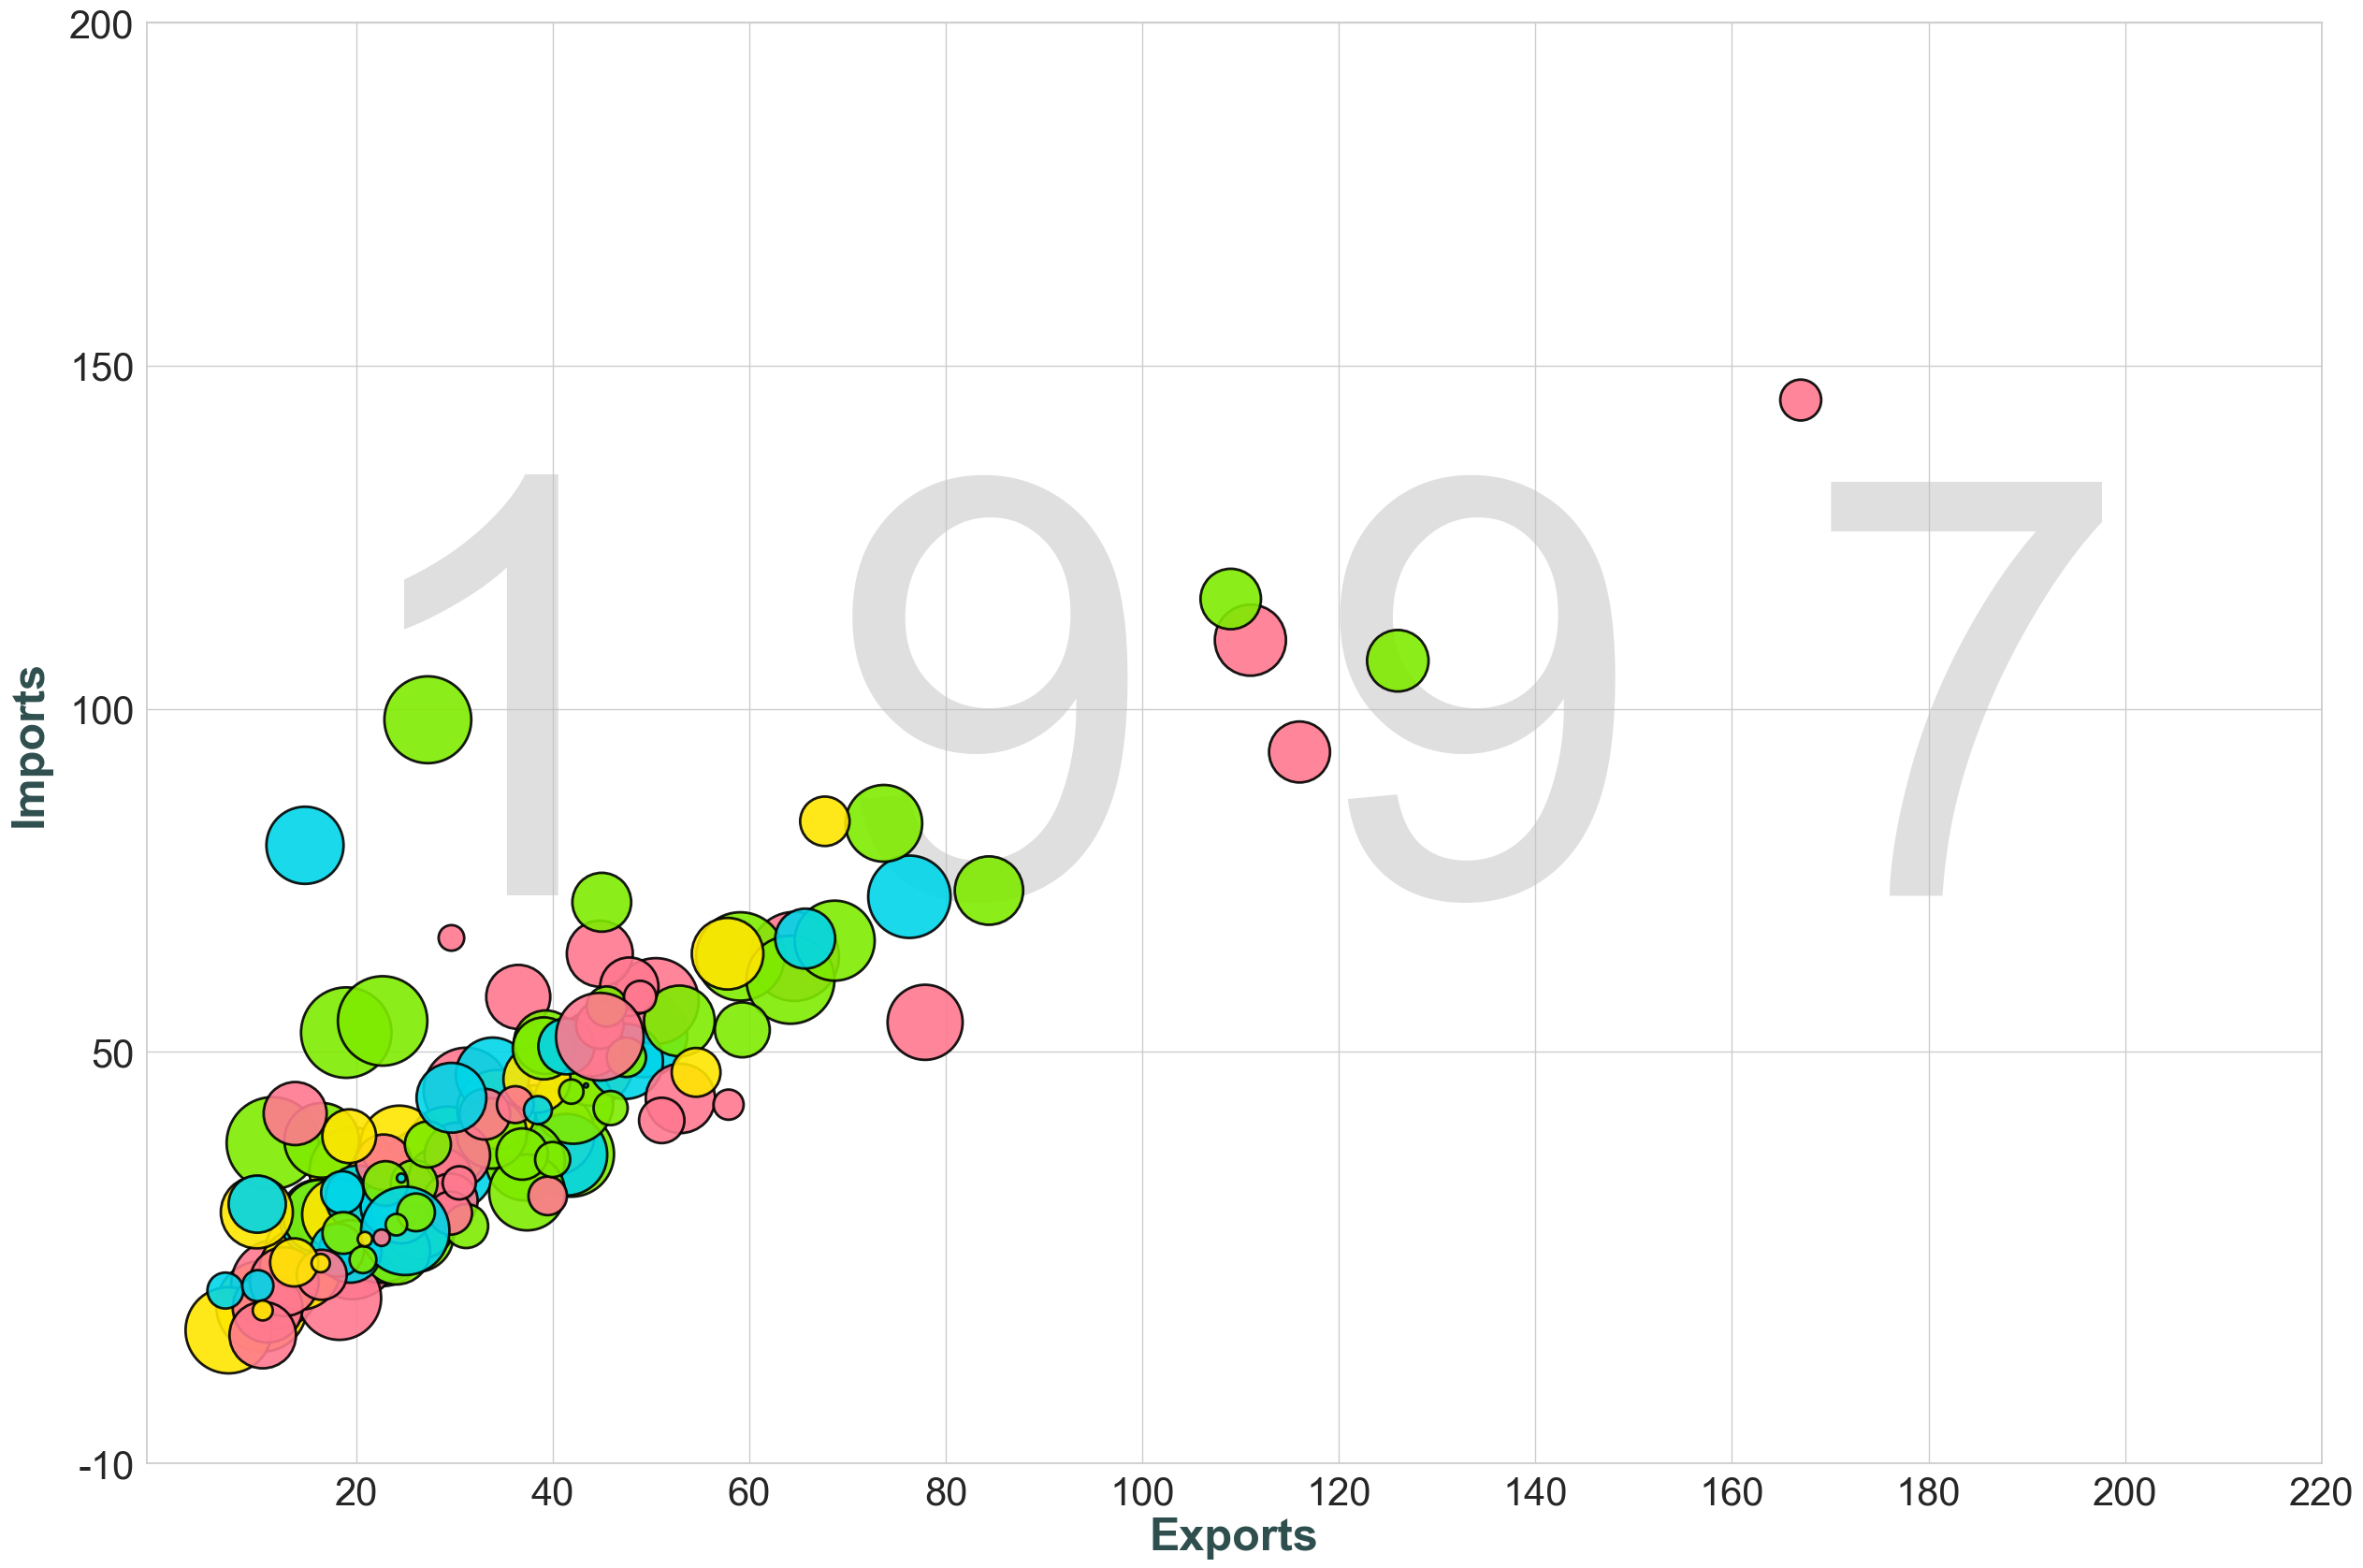

In [41]:
#Style the seaborn theme
sb.set_theme()
sb.set_style('whitegrid')
colors = ["#FF798F", "#7FEB00", "#00D5E9", "#FFE600"]
sb.set_palette(sb.color_palette(colors))

#Set notebook's figure size
plt.rcParams['figure.figsize'] = (30, 20)

#Set up bubble plot

q2_graph = sb.scatterplot(data = q2,
                         x = "exports",
                         y = "imports",
                         size = "energy",
                         legend = False,
                         alpha = 0.9,
                         hue = "four_regions",
                         edgecolor = "black",
                         linewidth = 2,
                         sizes = (10, 5000),
                         zorder = 3)


#Scale x-axis & y-axis
x_ticks = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220]
x_labels = [str(x) for x in x_ticks]

q2_graph.set_xticks(x_ticks)
q2_graph.set_xticklabels(x_labels, size = 30)


y_ticks = [-10 ,50, 100, 150, 200]
y_labels = [str(y) for y in y_ticks]

q2_graph.set_yticks(y_ticks)
q2_graph.set_yticklabels(y_labels, size = 30)

#Add 2022 Watermark & Income Level

q2_graph.text(0.5, 0.5, '1 9 9 7',
              transform = q2_graph.transAxes,
              fontsize = 450, 
              color='silver', 
              alpha=0.5,
              ha='center', 
              va='center',
              zorder = 1)




#Add label

plt.xlabel("Exports",
           fontweight = "bold",
           font = "Sans Serif",
           color = "darkslategray", 
           fontsize = '35', 
           horizontalalignment='center')

plt.ylabel("Imports", 
           fontweight = "bold",
           font = "Sans Serif",
           color = "darkslategray", 
           fontsize = '35', 
           verticalalignment='center',
           labelpad = 30)

/Users/minhtran/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 35 rows containing non-finite values.
/Users/minhtran/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_histogram : Removed 5 rows containing missing values.


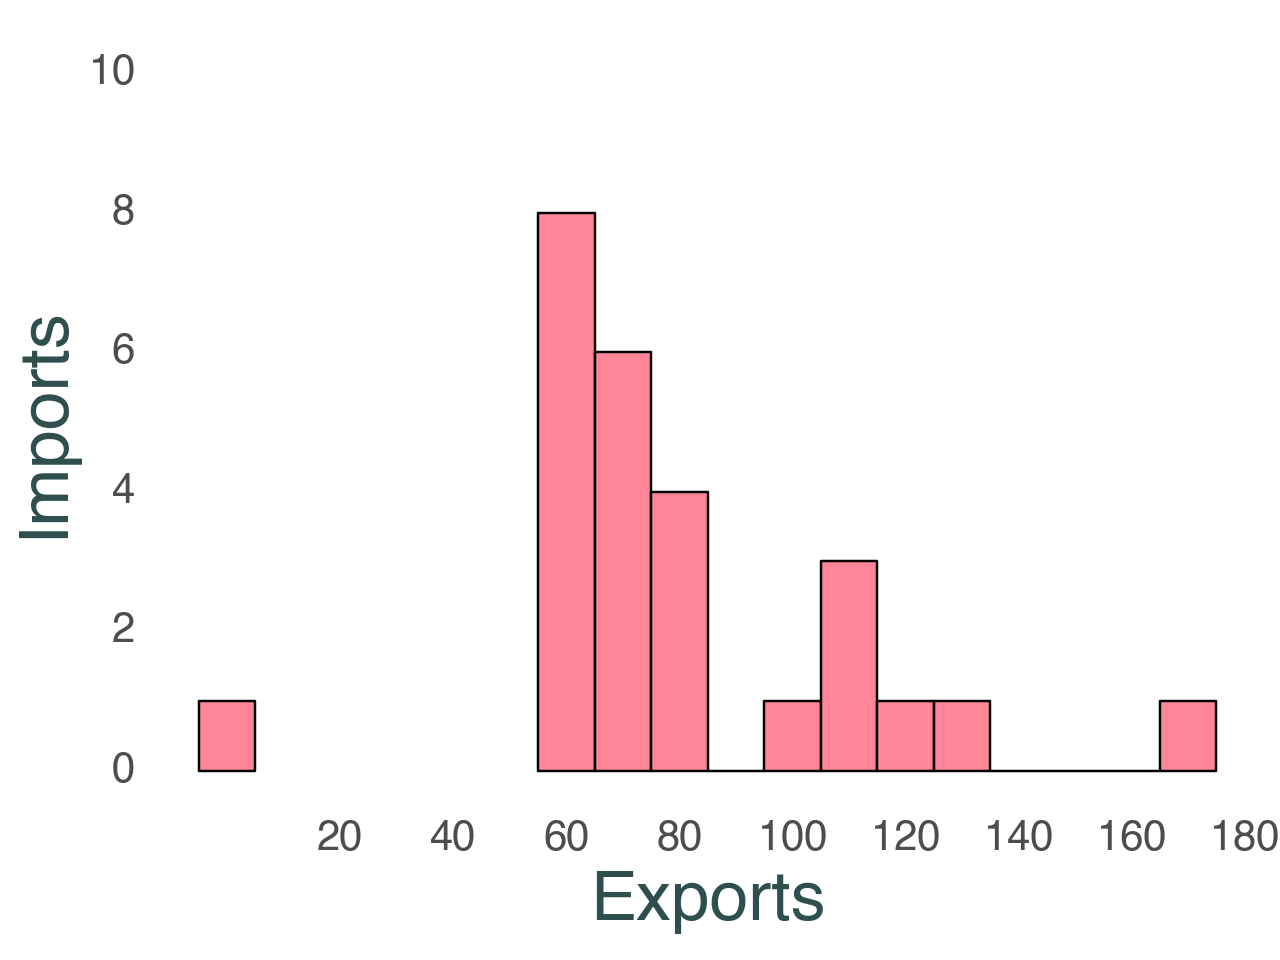

In [49]:


# Create the histogram plot
plot = ggplot(q2, aes(x='exports')) + \
    geom_histogram(binwidth=10, fill='#FF798F', color='black', alpha=0.9) + \
    scale_x_continuous(breaks=[20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220]) + \
    scale_y_continuous(breaks=[0, 2, 4, 6, 8, 10], limits=(0, 10)) + \
    labs(x="Exports", y="Imports") + \
    theme_minimal() + \
    theme(text=element_text(size=20),
          axis_text_x=element_text(size=15),
          axis_text_y=element_text(size=15),
          axis_title_x=element_text(size=25, face="bold", color="darkslategray"),
          axis_title_y=element_text(size=25, face="bold", color="darkslategray"),
          panel_grid_major=element_blank(),
          panel_grid_minor=element_blank())

# Display the plot
print(plot)

# Save the plot to a file (optional)
# plot.save("histogram_plot.png", dpi=300)

# Show the plot (optional)
# plot.draw()
# plt.show()


This plot is not a good plot because it failed to show the relationship between imports and exports. As we can see here, it is ineffective because it was only able to show exports and its frequency at best. Furthermore, it also failed to incorporate to other important variables, the continent (represented by different colors in the bubble graph) and the energy (represented by the different sizes of the bubble graph).

In [27]:
q3 = pd.read_csv("/Users/minhtran/Desktop/GSB544/Lab 1/Data/q3data.csv")
q3

,internet_users,gdp,income,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,0.00456,330.0,1190.0,2001,Afghanistan,asia,south_asia,asia_west,South Asia
1,0.39000,2570.0,6780.0,2001,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,1.59000,3770.0,9230.0,2001,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,10500.0,NaN,2001,American Samoa,NaN,NaN,NaN,NaN
4,11.30000,42600.0,35600.0,2001,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
...,...,...,...,...,...,...,...,...,...
210,1.85000,847.0,3270.0,2001,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
211,27.50000,36700.0,NaN,2001,Virgin Islands (U.S.),NaN,NaN,NaN,NaN
212,0.51900,1190.0,4940.0,2001,Yemen,asia,middle_east_north_africa,asia_west,Middle East & North Africa
213,0.47800,991.0,2080.0,2001,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


The aesthetics being used are:

Bubble Plot

- X-axis: Internet Users
- Y-axis: GDP
- Size: Income
- Color: continents (four_regions)
- There are also the labels of "Individuals using the Internet" on the x-axis and "GDP/capita" on the y-axis
- There is also a watermark of 2001 behind the graph

/var/folders/6w/jjc81v4j2yd2ccrn72bgbl3r0000gn/T/ipykernel_18930/265318195.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator


Text(0, 0.5, 'GDP/capita')

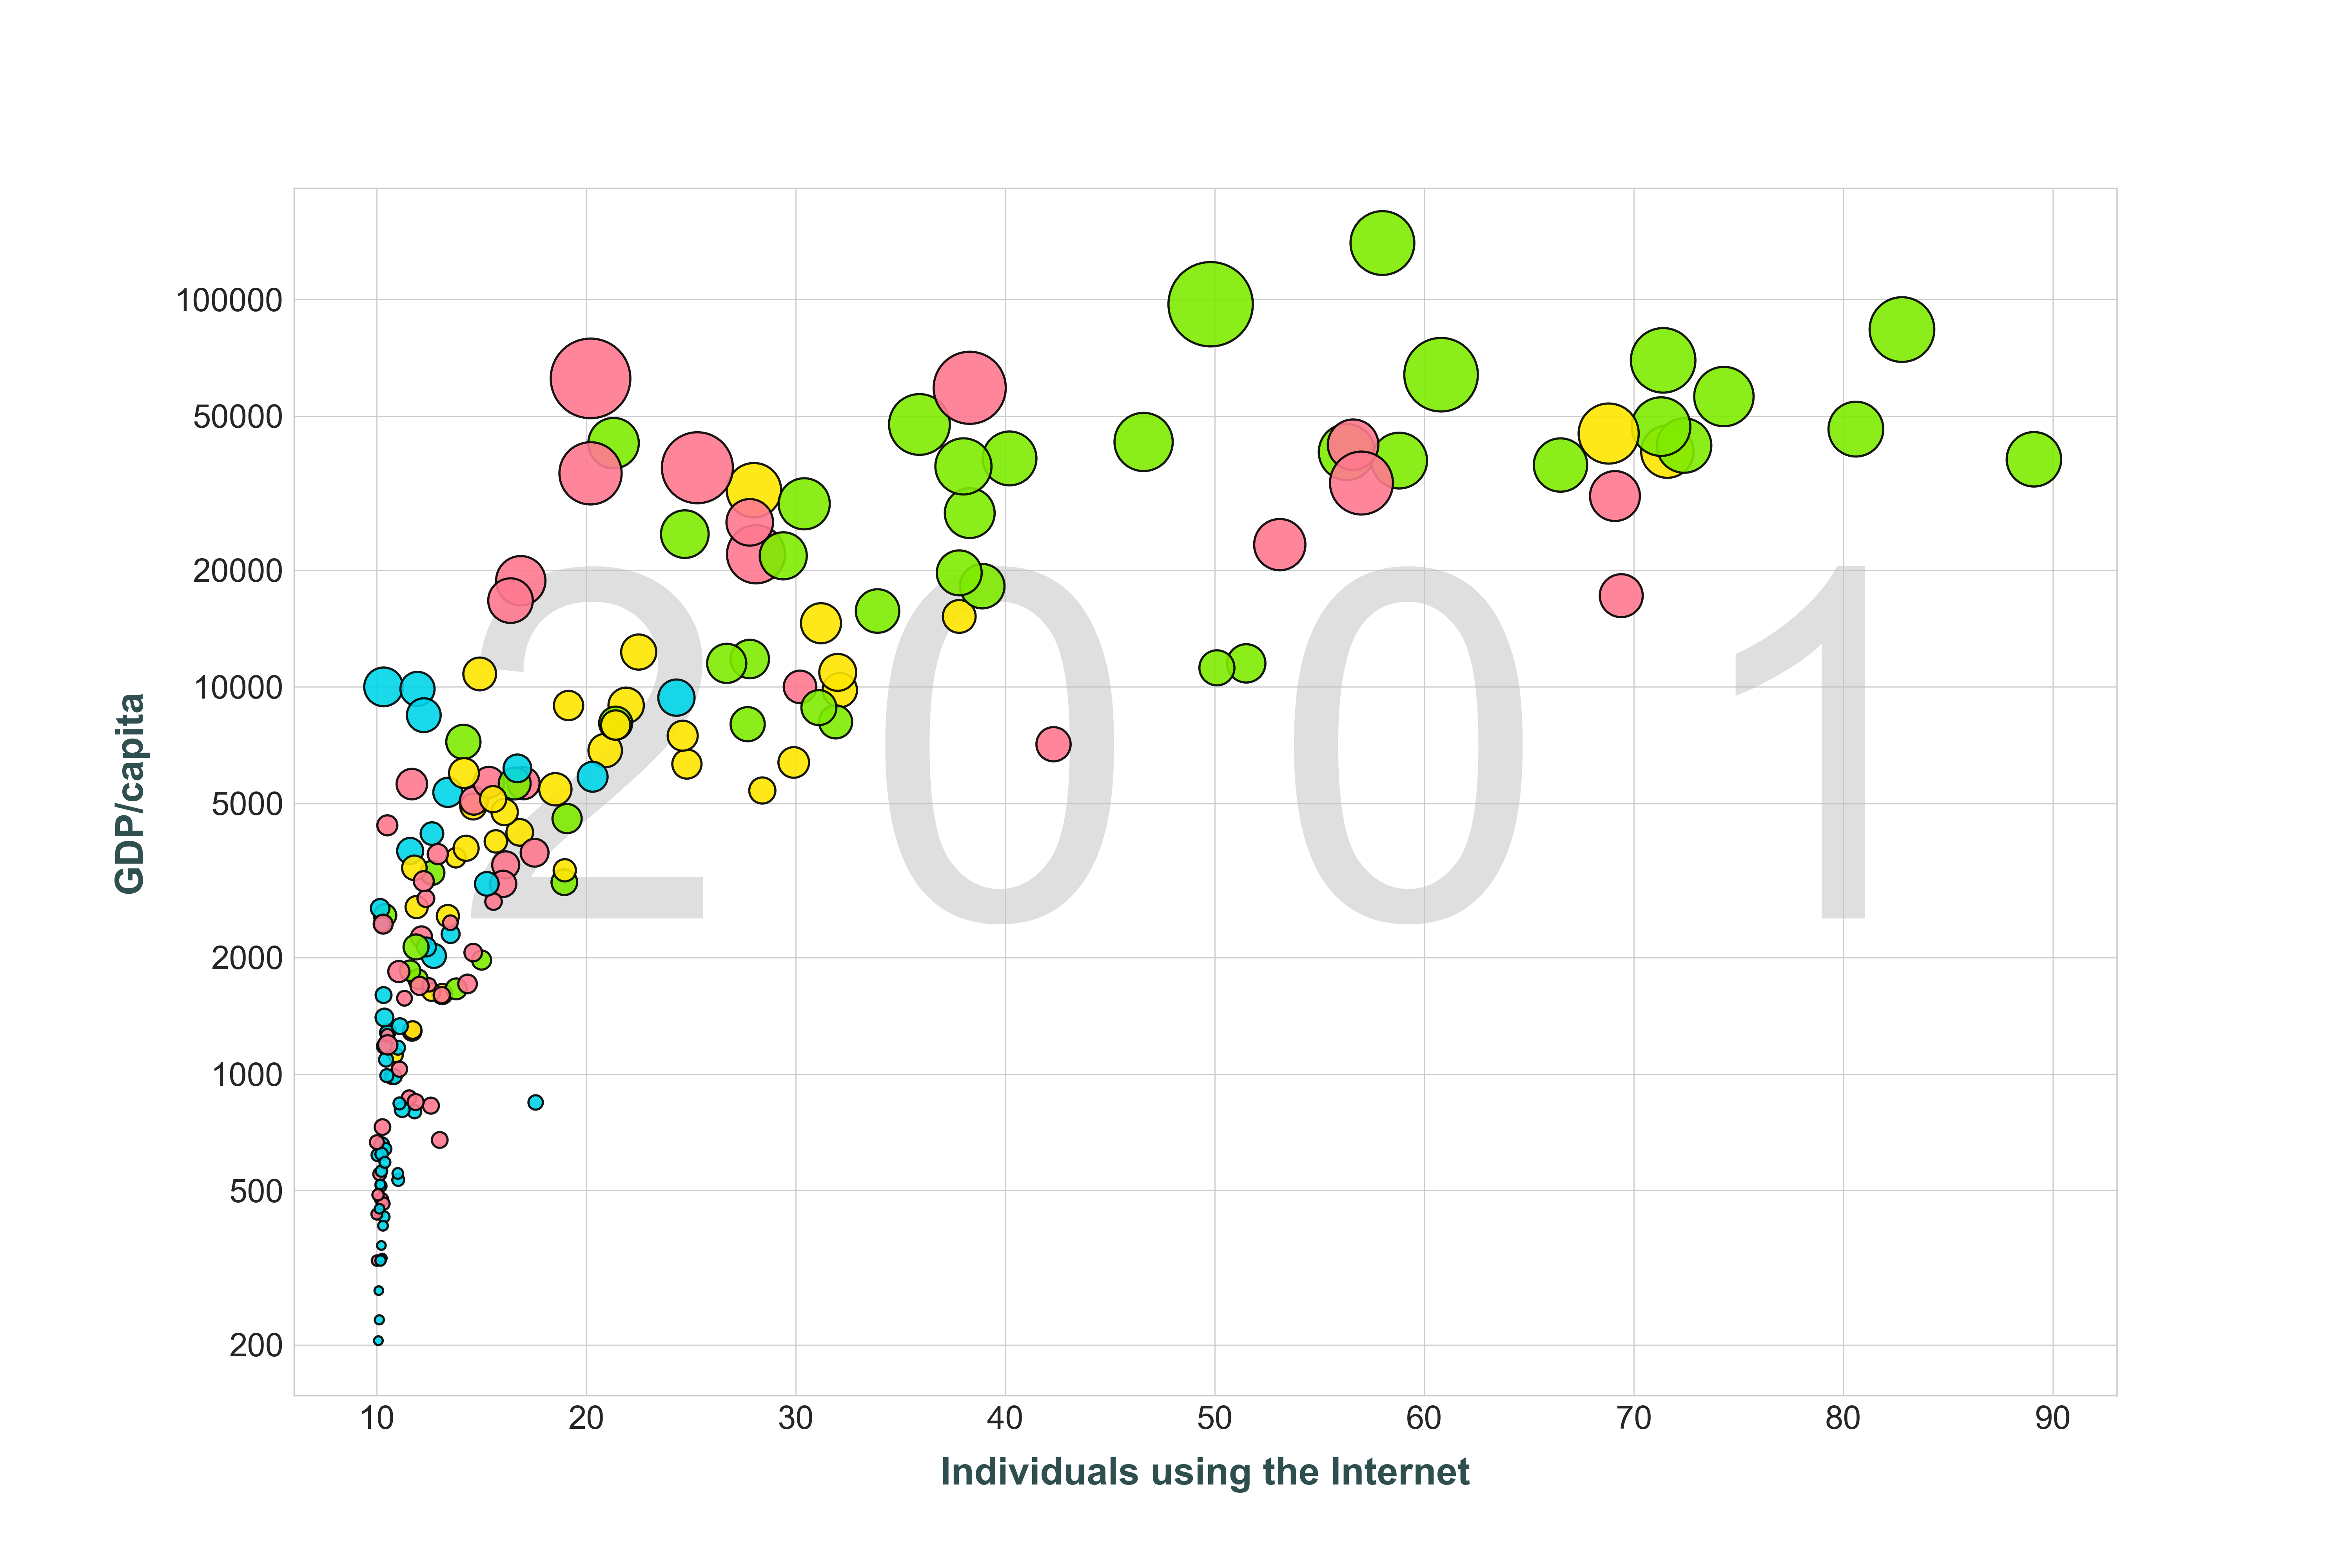

In [31]:
#Style the seaborn theme
sb.set_theme()
sb.set_style('whitegrid')
colors = ["#FF798F", "#7FEB00", "#00D5E9", "#FFE600"]
sb.set_palette(sb.color_palette(colors))

#Set notebook's figure size
plt.rcParams['figure.figsize'] = (30, 20)

#Set up bubble plot

q3_graph = sb.scatterplot(data = q3,
                         x = "internet_users",
                         y = "gdp",
                         size = "income",
                         legend = False,
                         alpha = 0.9,
                         hue = "four_regions",
                         edgecolor = "black",
                         linewidth = 2,
                         sizes = (60, 6000),
                         zorder = 3)

#Add 2022 Watermark & Income Level

q3_graph.text(0.5, 0.5, '2 0 0 1',
              transform = q3_graph.transAxes,
              fontsize = 450, 
              color='silver', 
              alpha=0.5,
              ha='center', 
              va='center',
              zorder = 1)

#Style fonts for x-axis & y-axis labels

x_ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
x_labels = [str(x) for x in x_ticks]


q1_graph.set_xticks(x_ticks)
q1_graph.set_xticklabels(x_labels, size = 30)


y_ticks = [200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
y_labels = [str(y) for y in y_ticks]

q3_graph.set_yscale('log')
q3_graph.set_yticks(y_ticks)


q3_graph.set_xticklabels(x_labels, size = 30)
q3_graph.set_yticklabels(y_labels, size = 30)
#Add labels

plt.xlabel("Individuals using the Internet",
           fontweight = "bold",
           font = "Sans Serif",
           color = "darkslategray", 
           fontsize = '35', 
           horizontalalignment='center',
           labelpad = 20)

plt.ylabel("GDP/capita", 
           fontweight = "bold",
           font = "Sans Serif",
           color = "darkslategray", 
           fontsize = '35', 
           verticalalignment='center',
           labelpad = 40)


/Users/minhtran/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_density : Removed 7 rows containing non-finite values.


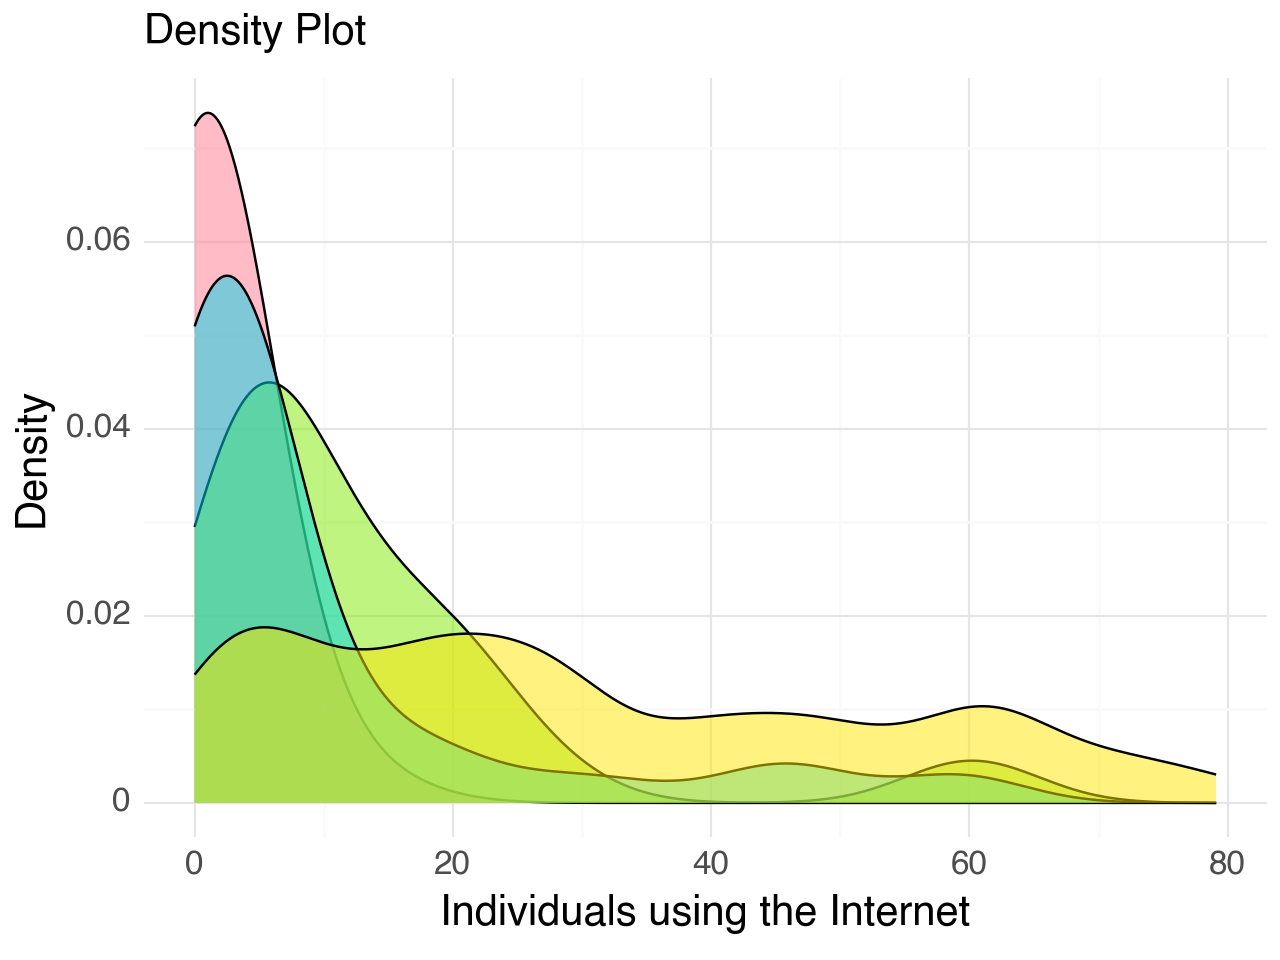

In [39]:

q3_filtered = q3.dropna(subset=['four_regions'])


# Create plotnine object



plot = (
    ggplot(q3_filtered, aes(x='internet_users')) +
    geom_density(aes(fill='four_regions'), alpha=0.5, bw=5) +  # Adjust the bw parameter
    scale_fill_manual(values=["#FF798F", "#7FEB00", "#00D5E9", "#FFE600"]) +
    theme_minimal() +
    labs(
        x="Individuals using the Internet",
        y="Density",
        title="Density Plot",
    ) +
    theme(
        text=element_text(size=15),
        axis_text=element_text(size=12),
        axis_title=element_text(size=15),
        legend_position='none'
    )
)
# Display the plot
print(plot)

Compared to the bubble plot, this plot is ineffective because it failed to show the relationship between individual using the internet and the GDP for each of the regions